# Create analytical flow fieldsets
With this notebook one can create several flowfields based on analytical flows that can be used 
as input for a parcels simulation. We create flowfields for the following analytical flows
- Kaufmann vortex flow (2D stationary vortex)
- 3D 

In [37]:
# import needed packages
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
plt.style.use('../python_style_Meike.mplstyle')

output_directory='/storage/shared/oceanparcels/output_data/data_Meike/MR_advection/fieldsets/'

## Kaufmann vortex flow
u(r,theta)=gamma/2pi * r/(a^2+b^2) hat(theta)
where we use a=1, gamma = 50

In [38]:
def kaufmann_vortex_field(gamm, a, xmin,xmax,ymin,ymax,dx,dy, tmin =0, tmax =1 , dt =1 , write_to_netcdf=False):
    x=np.arange(xmin,xmax+0.5*dx,dx)
    y=np.arange(ymin,ymax+0.5*dy,dy)
    times=np.arange(tmin,tmax,dt)
    X,Y=np.meshgrid(x,y)
    rr=X**2+Y**2
    r=np.sqrt(rr)
    aa=a*a
    speed=gamm * rr/(aa+rr) # gamma/(2*np.pi)
 
    theta=np.arctan2(Y,X)
    U=speed*(-np.sin(theta))
    V=speed*(np.cos(theta))
    if(write_to_netcdf==True):
        Utime=np.zeros((times.size,y.size,x.size),dtype=np.float32)
        Vtime=np.zeros((times.size,y.size,x.size),dtype=np.float32)
        for nt in range(times.size):
            Utime[nt]=U
            Vtime[nt]=V
            
        dset = xr.Dataset(
                
                data_vars=dict(U=(['time','lat','lon'],Utime),
                            V=(['time','lat','lon'],Vtime)),
                            coords=dict(
                                    lon=('lon',x),
                                    lat=('lat',y),
                                    time=times

                            ),
                            attrs=dict(
                                title='linear growth fieldset',
                                contact = 'm.f.bos@uu.nl')
            )
        dset.to_netcdf(output_directory+'kaufmann_vortex_field.nc')
    return X, Y, U, V


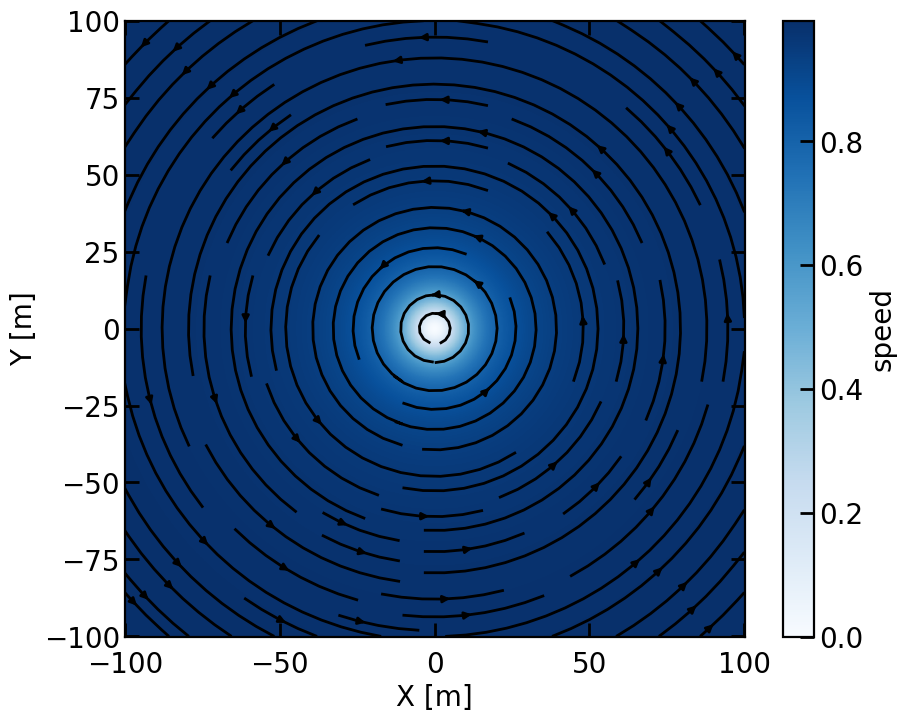

In [39]:
X,Y,U,V=kaufmann_vortex_field(1,10,-100,100,-100,100,0.1,0.1,0,1000,10,True)

fig,ax=plt.subplots()
ax.streamplot(X,Y, U, V,color='k')
pcm=ax.pcolormesh(X,Y,np.sqrt(U*U+V*V),cmap='Blues')
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")

cbar=fig.colorbar(pcm,label='speed')